# 1.) Pull in Data and Convert ot Monthly

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%***********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [4]:
#Difference in stockprice
df["Diff"] = df["Adj Close"].diff().shift(-1)

#Target up or down
df["Target"] = np.sign(df["Diff"])

#Option Premium
df["Premium"] = .08 *df["Adj Close"]

In [5]:
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [7]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [8]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30",:].copy()
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


In [9]:
logreg = LogisticRegression()

logreg.fit(X,y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [10]:
df["Predictions"] = y_pred

In [11]:
df["Profits"] = 0.

#True Positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == 1), "Profits" ] = df["Premium"]

#False Positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == -1), "Profits" ] = 100*df['Diff'] + df["Premium"]

#True Negatives
#=0

#False Negatives
#=0

# 5.) Plot profits over time

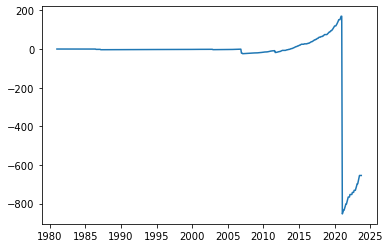

In [12]:
plt.plot(np.cumsum(df["Profits"]))
plt.show()

In 2020-2021 (pandemic), there might be false positive. As a result, the company lost all the profits it had accumulated and experienced a decline of 800 units since the launching of business division.

# Q5.5.) Short write up about how you see your skills valuable to PJ and/or Philip Liu

By leveraging data mining, economic theories, and data management, we can help the company to make informed decisions to optimize their profit (i.e targeted and cost-effective advertising strategies, giving valuable insights that can be shared with their business partners)

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.